<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [4]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date, time, timezone, timedelta 
import os
import re

from functools import reduce
from collections import defaultdict
from scipy import stats

# Customer Analysis

In [3]:
os.listdir()

['.config',
 '1_orders_dataset.csv',
 'sample-sales-data.csv',
 '1_customers_dataset.csv',
 'test.csv',
 'ecommerce-data.csv',
 'online_retail.xlsx',
 'ab_experiment.csv',
 'sales_data_with_stores.csv',
 'bz_data_analyis.csv',
 'groceries.csv',
 'lead_conversion.csv',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'online_retail_II.xlsx',
 'cookie_cats.csv',
 'match_result_test.csv',
 '1_order_payments_dataset.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sales_vs_discount.csv',
 'sales.csv',
 'app_wau.csv',
 'mock_sales_data.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'sample_data']

In [7]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [12]:
cnt = pd.melt(df, id_vars = ['userid', 'version', 'sum_gamerounds'], var_name='retention', value_name = 'result')
cnt = cnt.groupby(['version', 'retention', 'result'])['userid'].count().reset_index().rename(columns = {'userid':'cnt'})
cnt = cnt[cnt['result'] == True]
cnt

,version,retention,result,cnt
1,gate_30,retention_1,True,20034
3,gate_30,retention_7,True,8502
5,gate_40,retention_1,True,20119
7,gate_40,retention_7,True,8279


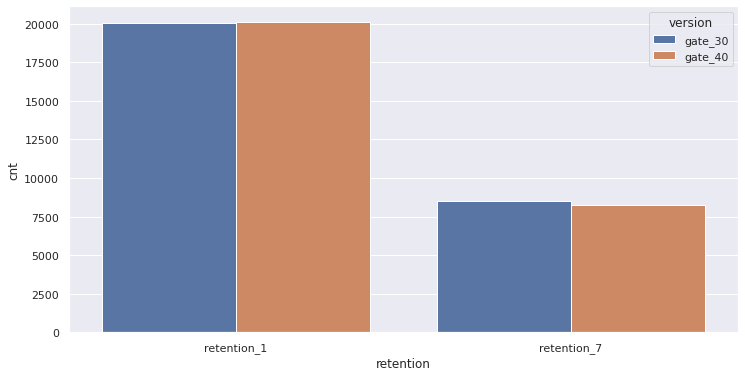

In [15]:
sns.set(rc = {'figure.figsize':[12, 6]})
sns.barplot(data = cnt, x = 'retention', y = 'cnt', hue = 'version')
plt.show()

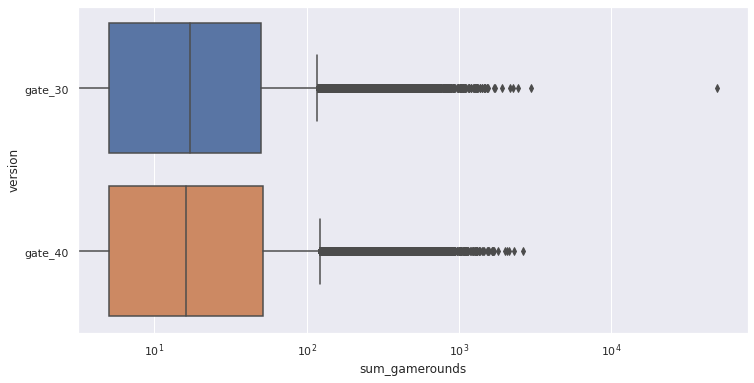

In [20]:
sns.set(rc = {'figure.figsize':[12,6]})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

In [21]:
df = df[df['sum_gamerounds'] <= 10000]

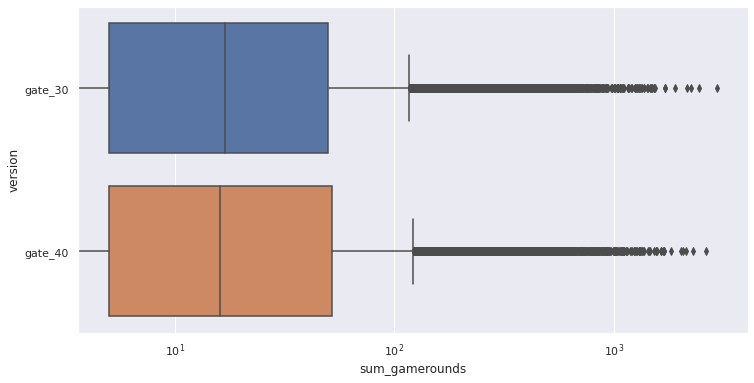

In [22]:
sns.set(rc = {'figure.figsize':[12,6]})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

((array([-4.32330209, -4.12353114, -4.01483812, ...,  4.01483812,
          4.12353114,  4.32330209]),
  array([   0,    0,    0, ..., 2438, 2640, 2961])),
 (71.54691083221576, 51.32025324876927, 0.696746813756345))

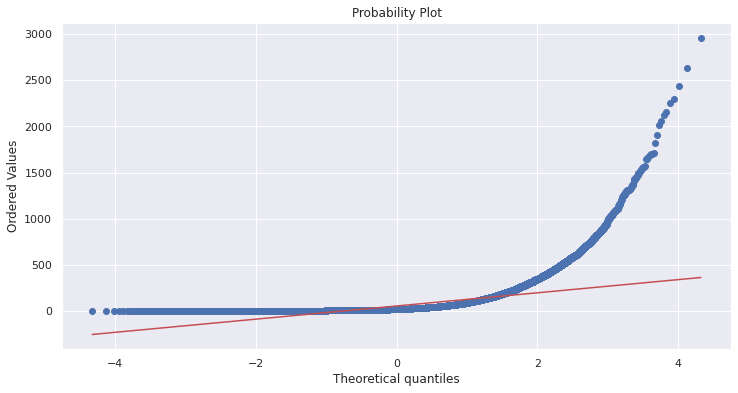

In [23]:
stats.probplot(df['sum_gamerounds'], dist = 'norm', plot = plt)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


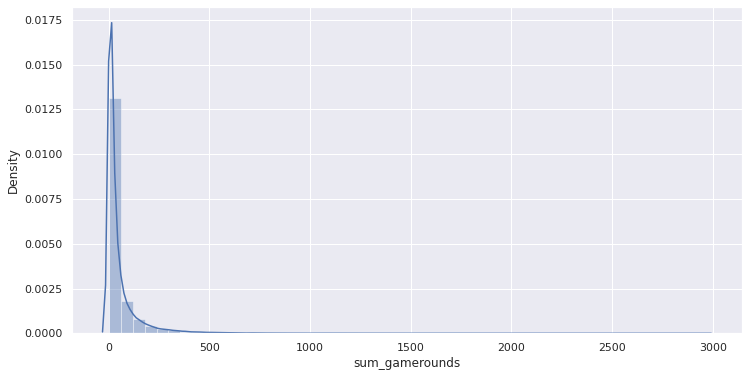

In [24]:
sns.distplot(df['sum_gamerounds'], kde = True)

In [26]:
stat, p = stats.normaltest(df['sum_gamerounds'])
print(str(stat) + '\n' + str(p))

104181.60505148777
0.0


In [27]:
stat, p = stats.chisquare(df['sum_gamerounds'])
print(str(stat) + '\n' + str(p))

18528909.99029161
0.0


In [29]:
n = 1000
boots = pd.DataFrame(
    [df.sample(frac = .1, replace = True).groupby(['version'])['sum_gamerounds'].mean() for i in range(n)]
)
boots.head()

version,gate_30,gate_40
sum_gamerounds,50.593021,48.584889
sum_gamerounds,50.949944,54.184487
sum_gamerounds,52.657005,53.966181
sum_gamerounds,49.923077,50.270948
sum_gamerounds,54.186505,52.214568


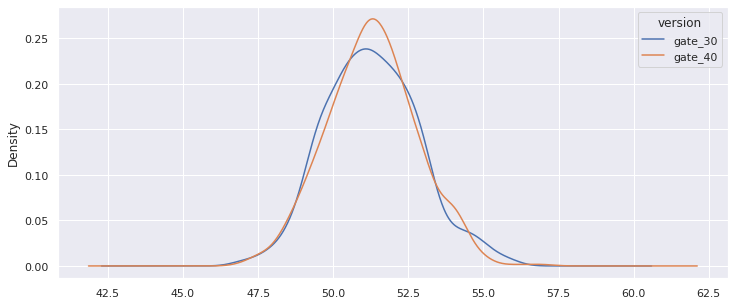

In [32]:
sns.set(rc = {'figure.figsize':[12,5]})
boots.plot.kde()
plt.show()

In [33]:
diff = boots['gate_30'] - boots['gate_40']
diff = diff[diff > 0]
len(diff)/n

0.504

# Iterators

In [34]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [35]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}